## **xG Scatter Plot** - **_AC Milan_**

In [8]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from highlight_text import fig_text

from PIL import Image
import urllib
import json
import os

import soccerdata as sd

##### **Data Preparation**

In [2]:
fotmob = sd.FotMob(leagues='ITA-Serie A', seasons='2023/2024')
print(fotmob.__doc__)

[06/10/24 22:28:52] INFO     Saving cached data to C:\Users\FC\soccerdata\data\FotMob                 ]8;id=14137;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=52024;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\_common.py#92\92]8;;\

Provides pd.DataFrames from data available at http://www.fotmob.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FotMob``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of Leagues to include.
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - 'tor': Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - list(d

In [3]:
league_table = fotmob.read_league_table()
league_table.head()

team  MP   W   D   L  GF  GA  GD  Pts
league      season                                           
ITA-Serie A 2324       Inter  38  29   7   2  89  22  67   94
            2324    AC Milan  38  22   9   7  76  49  27   75
            2324    Juventus  38  19  14   5  54  31  23   71
            2324    Atalanta  38  21   6  11  72  42  30   69
            2324     Bologna  38  18  14   6  54  32  22   68

In [4]:
schedule = fotmob.read_schedule()
schedule.head()

round week   
league      season game                                          
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona      1    1  \
                   2023-08-19 Frosinone-SSC Napoli      1    1   
                   2023-08-19 Genoa-Fiorentina          1    1   
                   2023-08-19 Inter-Monza               1    1   
                   2023-08-20 Lecce-Lazio               1    1   

                                                                        date   
league      season game                                                        
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona 2023-08-19 16:30:00+00:00  \
                   2023-08-19 Frosinone-SSC Napoli 2023-08-19 16:30:00+00:00   
                   2023-08-19 Genoa-Fiorentina     2023-08-19 18:45:00+00:00   
                   2023-08-19 Inter-Monza          2023-08-19 18:45:00+00:00   
                   2023-08-20 Lecce-Lazio          2023-08-20 18:45:00+00:00   

                                                    home_team      away_team   
league      season game                                                        
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona     Empoli  Hellas Verona  \
                   2023-08-19 Frosinone-SSC Napoli  Frosinone     SSC Napoli   
                   2023-08-19 Genoa-Fiorentina          Genoa     Fiorentina   
                   2023-08-19 Inter-Monza               Inter          Monza   
                   2023-08-20 Lecce-Lazio               Lecce          Lazio   

                                                   home_score away_score   
league      season game                                                    
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona         0           1  \
                   2023-08-19 Frosinone-SSC Napoli         1           3   
                   2023-08-19 Genoa-Fiorentina             1           4   
                   2023-08-19 Inter-Monza                  2           0   
                   2023-08-20 Lecce-Lazio                  2           1   

                                                   status  game_id   
league      season game                                              
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona     FT  4230531  \
                   2023-08-19 Frosinone-SSC Napoli     FT  4230532   
                   2023-08-19 Genoa-Fiorentina         FT  4230537   
                   2023-08-19 Inter-Monza              FT  4230533   
                   2023-08-20 Lecce-Lazio              FT  4230539   

                                                                                                  url  
league      season game                                                                                
ITA-Serie A 2324   2023-08-19 Empoli-Hellas Verona  https://fotmob.com/matches/empoli-vs-hellas-ve...  
                   2023-08-19 Frosinone-SSC Napoli  https://fotmob.com/matches/ssc-napoli-vs-frosi...  
                   2023-08-19 Genoa-Fiorentina      https://fotmob.com/matches/fiorentina-vs-genoa...  
                   2023-08-19 Inter-Monza           https://fotmob.com/matches/monza-vs-inter/1w8t...  
                   2023-08-20 Lecce-Lazio           https://fotmob.com/matches/lazio-vs-lecce/2t4w...

In [5]:
match_stats_acm = fotmob.read_team_match_stats(opponent_stats=True, team='AC Milan')
match_stats_acm.head()

[06/10/24 22:30:14] INFO     [1/38] Retrieving game with id=4230530                                   ]8;id=542798;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=821412;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [2/38] Retrieving game with id=4230544                                   ]8;id=870876;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=328971;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:15] INFO     [3/38] Retrieving game with id=4230560                                   ]8;id=985787;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=253161;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [4/38] Retrieving game with id=4230564                                   ]8;id=293832;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=605752;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [5/38] Retrieving game with id=4230578                                   ]8;id=973029;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=160530;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:16] INFO     [6/38] Retrieving game with id=4230581                                   ]8;id=84288;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=428982;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:17] INFO     [7/38] Retrieving game with id=4230599                                   ]8;id=99277;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=148018;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [8/38] Retrieving game with id=4230604                                   ]8;id=584081;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=680650;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:18] INFO     [9/38] Retrieving game with id=4230617                                   ]8;id=411125;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=263138;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [10/38] Retrieving game with id=4230630                                  ]8;id=627573;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=661339;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:19] INFO     [11/38] Retrieving game with id=4230639                                  ]8;id=68010;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=877076;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [12/38] Retrieving game with id=4230646                                  ]8;id=798148;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=39056;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [13/38] Retrieving game with id=4230661                                  ]8;id=147067;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=381685;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:20] INFO     [14/38] Retrieving game with id=4230669                                  ]8;id=714438;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=730597;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [15/38] Retrieving game with id=4230674                                  ]8;id=214147;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=517834;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [16/38] Retrieving game with id=4230688                                  ]8;id=791269;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=759348;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:21] INFO     [17/38] Retrieving game with id=4230702                                  ]8;id=752277;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=34125;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [18/38] Retrieving game with id=4230710                                  ]8;id=704733;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=703473;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:22] INFO     [19/38] Retrieving game with id=4230715                                  ]8;id=228871;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=703848;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [20/38] Retrieving game with id=4230729                                  ]8;id=111017;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=149170;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:23] INFO     [21/38] Retrieving game with id=4230742                                  ]8;id=948848;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=689531;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [22/38] Retrieving game with id=4230750                                  ]8;id=873057;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=796410;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [23/38] Retrieving game with id=4230757                                  ]8;id=130156;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=703612;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:24] INFO     [24/38] Retrieving game with id=4230768                                  ]8;id=313683;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=403043;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [25/38] Retrieving game with id=4230783                                  ]8;id=847599;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=384241;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [26/38] Retrieving game with id=4230789                                  ]8;id=927205;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=16899;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:25] INFO     [27/38] Retrieving game with id=4230797                                  ]8;id=642390;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=122946;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:26] INFO     [28/38] Retrieving game with id=4230817                                  ]8;id=90125;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=38745;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [29/38] Retrieving game with id=4230826                                  ]8;id=198787;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=141825;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:27] INFO     [30/38] Retrieving game with id=4230836                                  ]8;id=633973;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=443510;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [31/38] Retrieving game with id=4230824                                  ]8;id=206406;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=646285;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [32/38] Retrieving game with id=4230852                                  ]8;id=215709;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=733978;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:29] INFO     [33/38] Retrieving game with id=4230862                                  ]8;id=542548;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=465950;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:30] INFO     [34/38] Retrieving game with id=4230869                                  ]8;id=320780;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=934171;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [35/38] Retrieving game with id=4230879                                  ]8;id=542101;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=242773;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:31] INFO     [36/38] Retrieving game with id=4230892                                  ]8;id=242619;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=625444;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

                    INFO     [37/38] Retrieving game with id=4230903                                  ]8;id=846695;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=664163;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

[06/10/24 22:30:32] INFO     [38/38] Retrieving game with id=4230911                                  ]8;id=396545;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py\fotmob.py]8;;\:]8;id=627900;file://c:\Users\FC\miniconda3\envs\football\Lib\site-packages\soccerdata\fotmob.py#398\398]8;;\

Accurate passes   
league      season game                        team                       
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan             409  \
                                               Bologna              481   
                   2023-08-26 AC Milan-Torino  AC Milan             431   
                                               Torino               272   
                   2023-09-01 Roma-AC Milan    AC Milan             478   

                                                        Ball possession   
league      season game                        team                       
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan              47  \
                                               Bologna               53   
                   2023-08-26 AC Milan-Torino  AC Milan              59   
                                               Torino                41   
                   2023-09-01 Roma-AC Milan    AC Milan              57   

                                                        Big chances   
league      season game                        team                   
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan           2  \
                                               Bologna            0   
                   2023-08-26 AC Milan-Torino  AC Milan           4   
                                               Torino             0   
                   2023-09-01 Roma-AC Milan    AC Milan           1   

                                                        Big chances missed   
league      season game                        team                          
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan                  1  \
                                               Bologna                   0   
                   2023-08-26 AC Milan-Torino  AC Milan                  0   
                                               Torino                    0   
                   2023-09-01 Roma-AC Milan    AC Milan                  0   

                                                        Corners   
league      season game                        team               
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan       6  \
                                               Bologna        3   
                   2023-08-26 AC Milan-Torino  AC Milan       2   
                                               Torino         1   
                   2023-09-01 Roma-AC Milan    AC Milan       5   

                                                        Expected goals (xG)   
league      season game                        team                           
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan                0.90  \
                                               Bologna                 1.06   
                   2023-08-26 AC Milan-Torino  AC Milan                3.04   
                                               Torino                  0.48   
                   2023-09-01 Roma-AC Milan    AC Milan                1.66   

                                                        Fouls committed   
league      season game                        team                       
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan               4  \
                                               Bologna               10   
                   2023-08-26 AC Milan-Torino  AC Milan              13   
                                               Torino                16   
                   2023-09-01 Roma-AC Milan    AC Milan              15   

                                                        Shots on target   
league      season game                        team                       
ITA-Serie A 2324   2023-08-21 Bologna-AC Milan AC Milan               6  \
                                               Bologna                5   
                   2023-08-26 AC Milan-Torino  AC Milan               7   
                                  

In [35]:
match_stats_acm.to_csv('../data/raw_match_stats_acm_23-24.csv')

##### **Data Modeling**

In [10]:
# resetting the index to turn multi-level index into columns
match_stats_acm_reset = match_stats_acm.reset_index()

# filter df
filtered_match_stats_acm = match_stats_acm_reset[['game', 'team', 'Expected goals (xG)']]
print(filtered_match_stats_acm)

                               game         team Expected goals (xG)
0       2023-08-21 Bologna-AC Milan     AC Milan                0.90
1       2023-08-21 Bologna-AC Milan      Bologna                1.06
2        2023-08-26 AC Milan-Torino     AC Milan                3.04
3        2023-08-26 AC Milan-Torino       Torino                0.48
4          2023-09-01 Roma-AC Milan     AC Milan                1.66
..                              ...          ...                 ...
71     2024-05-11 AC Milan-Cagliari     Cagliari                1.50
72       2024-05-18 Torino-AC Milan     AC Milan                1.96
73       2024-05-18 Torino-AC Milan       Torino                0.94
74  2024-05-25 AC Milan-Salernitana     AC Milan                2.99
75  2024-05-25 AC Milan-Salernitana  Salernitana                1.66

[76 rows x 3 columns]


In [25]:
# extract date from the 'game' column
filtered_match_stats_acm.loc[:, 'date'] = filtered_match_stats_acm['game'].str[:10]

# determine if the game is home ('H') or away ('A') for AC Milan
filtered_match_stats_acm.loc[:, 'venue'] = filtered_match_stats_acm['game'].apply(lambda x: 'H' if 'AC Milan-' in x else 'A')

# split data into AC Milan and opponents, using .copy() to avoid SettingWithCopyWarning
df_ac_milan = filtered_match_stats_acm[filtered_match_stats_acm['team'] == 'AC Milan'].copy()
df_opponent = filtered_match_stats_acm[filtered_match_stats_acm['team'] != 'AC Milan'].copy()

# rename columns for merging
df_ac_milan = df_ac_milan.rename(columns={'Expected goals (xG)': 'xG For'})
df_opponent = df_opponent.rename(columns={'Expected goals (xG)': 'xG Against'})

# merge the data on the game and date columns
match_stats_acm_2324 = pd.merge(df_ac_milan[['game', 'date', 'xG For', 'venue']], 
                     df_opponent[['game', 'xG Against', 'team']], 
                     on='game')

# rename the opponent team column for clarity
match_stats_acm_2324 = match_stats_acm_2324.rename(columns={'team': 'opponent'})

# add a new column with team 'AC Milan'
match_stats_acm_2324['team'] = 'AC Milan'

# reorder columns if necessary
match_stats_acm_2324 = match_stats_acm_2324[['date', 'game', 'team', 'opponent', 'xG For', 'xG Against', 'venue']]
print(match_stats_acm_2324)

          date                               game      team       opponent   
0   2023-08-21        2023-08-21 Bologna-AC Milan  AC Milan        Bologna  \
1   2023-08-26         2023-08-26 AC Milan-Torino  AC Milan         Torino   
2   2023-09-01           2023-09-01 Roma-AC Milan  AC Milan           Roma   
3   2023-09-16          2023-09-16 Inter-AC Milan  AC Milan          Inter   
4   2023-09-23  2023-09-23 AC Milan-Hellas Verona  AC Milan  Hellas Verona   
5   2023-09-27       2023-09-27 Cagliari-AC Milan  AC Milan       Cagliari   
6   2023-09-30          2023-09-30 AC Milan-Lazio  AC Milan          Lazio   
7   2023-10-07          2023-10-07 Genoa-AC Milan  AC Milan          Genoa   
8   2023-10-22       2023-10-22 AC Milan-Juventus  AC Milan       Juventus   
9   2023-10-29     2023-10-29 SSC Napoli-AC Milan  AC Milan     SSC Napoli   
10  2023-11-04        2023-11-04 AC Milan-Udinese  AC Milan        Udinese   
11  2023-11-11          2023-11-11 Lecce-AC Milan  AC Milan     

In [26]:
match_stats_acm_2324.head()

,date,game,team,opponent,xG For,xG Against,venue
0,2023-08-21,2023-08-21 Bologna-AC Milan,AC Milan,Bologna,0.90,1.06,A
1,2023-08-26,2023-08-26 AC Milan-Torino,AC Milan,Torino,3.04,0.48,H
2,2023-09-01,2023-09-01 Roma-AC Milan,AC Milan,Roma,1.66,0.71,A
3,2023-09-16,2023-09-16 Inter-AC Milan,AC Milan,Inter,1.06,2.65,A
4,2023-09-23,2023-09-23 AC Milan-Hellas Verona,AC Milan,Hellas Verona,0.93,0.62,H


In [28]:
match_stats_acm_2324.dtypes

date          object
game          object
team          object
opponent      object
xG For        object
xG Against    object
venue         object
dtype: object

In [29]:
match_stats_acm_2324['xG Against'] = pd.to_numeric(match_stats_acm_2324['xG Against'])
match_stats_acm_2324['xG For'] = pd.to_numeric(match_stats_acm_2324['xG For'])

In [33]:
match_stats_acm_2324.to_csv('../data/match_stats_acm_23-24.csv', index=False)

##### **Data Visualization**

In [40]:
match_stats_acm_2324 = pd.read_csv('../data/match_stats_acm_23-24.csv')
match_stats_acm_2324.head()

,date,game,team,opponent,xG For,xG Against,venue
0,2023-08-21,2023-08-21 Bologna-AC Milan,AC Milan,Bologna,0.90,1.06,A
1,2023-08-26,2023-08-26 AC Milan-Torino,AC Milan,Torino,3.04,0.48,H
2,2023-09-01,2023-09-01 Roma-AC Milan,AC Milan,Roma,1.66,0.71,A
3,2023-09-16,2023-09-16 Inter-AC Milan,AC Milan,Inter,1.06,2.65,A
4,2023-09-23,2023-09-23 AC Milan-Hellas Verona,AC Milan,Hellas Verona,0.93,0.62,H


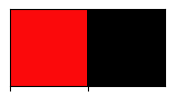

In [41]:
acm_v1 = ['#FB090B','#000000']
sns.palplot(sns.color_palette(acm_v1))

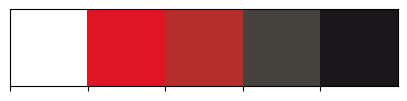

In [42]:
acm_v2 = ['#FFFFFF','#E11624', '#B52E2B', '#46433F', '#1A161A']
sns.palplot(sns.color_palette(acm_v2))

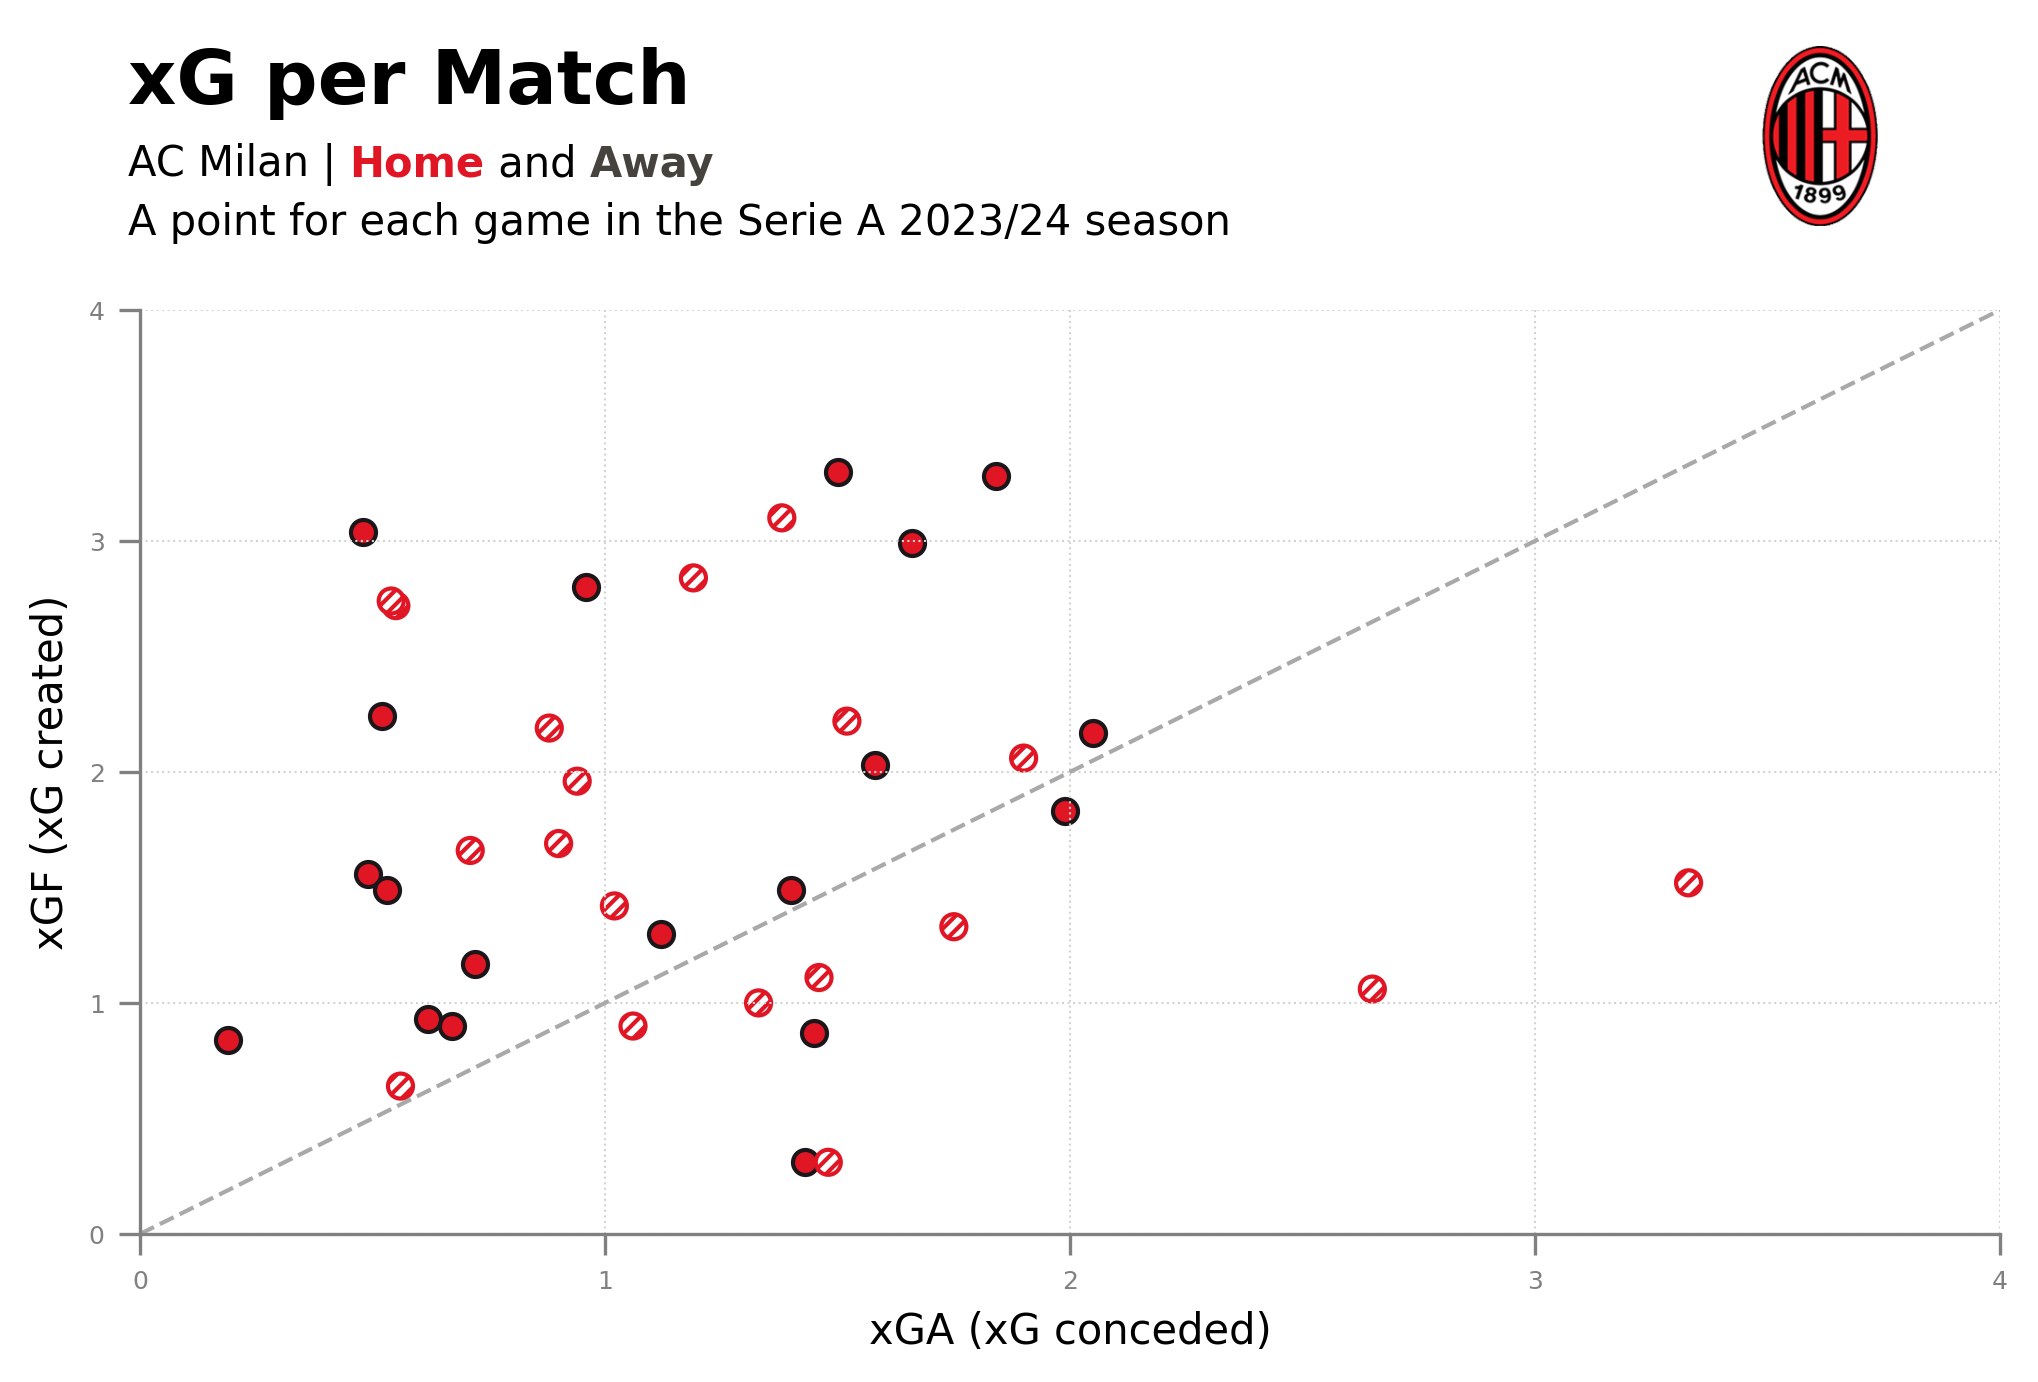

In [72]:
fig = plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.5,
    ls = ":",
    color = "lightgrey"
)

# filter data for AC Milan
df_ac_milan = match_stats_acm_2324[match_stats_acm_2324['team'] == 'AC Milan']

# filter home and away matches
df_home = df_ac_milan[df_ac_milan['venue'] == 'H'].copy()
df_away = df_ac_milan[df_ac_milan['venue'] == 'A'].copy()

# create the scatter plot
plt.scatter(df_ac_milan['xG Against'], df_ac_milan['xG For'], alpha=.1, lw=1, label='All Matches')
plt.scatter(df_home['xG Against'], df_home['xG For'], alpha=1, lw=1, ec='#1A161A', fc='#E11624', label='Home Matches')
plt.scatter(df_away['xG Against'], df_away['xG For'], alpha=1, lw=1, ec='#E11624', fc='#FFFFFF', hatch='///////', label='Away Matches')
plt.xlim(0, round(df_ac_milan[['xG Against', 'xG For']].max().max() + 0.5))
plt.ylim(0, round(df_ac_milan[['xG Against', 'xG For']].max().max() + 0.5))
plt.plot([0, plt.xlim()[1]], [0, plt.ylim()[1]], ls='--', color='darkgrey', lw=1)

plt.xlabel('xGA (xG conceded)')
plt.ylabel('xGF (xG created)')

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "grey",
    length = 5,
    which = "major",
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "xG per Match",
    color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "AC Milan | <Home> and <Away>\nA point for each game in the Serie A 2023/24 season",
    highlight_textprops=[
        {"color": "#E11624", "weight": "bold"},
        {"color": "#46433F", "weight": "bold"}
    ],
    color = "black",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

# scrape Fotmob's website and plot the image directly into the visual
# create a new axes object to draw the image
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .95, 0.15, 0.15], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

plt.show()

In [73]:
# save figure
fig.savefig('../figures/ACM-xG-scatter-plot.png', bbox_inches='tight')